In [11]:
import os
import shutil

import keras
from keras import layers
from keras import models

In [6]:
# Check and choose current path
print(os.getcwd())
os.chdir('c:/Users/user/Desktop/과제')
print(os.getcwd())

c:\Users\user\Desktop\과제
c:\Users\user\Desktop\과제


In [7]:
# Original Data Path
original_dataset_dir = './datasets/dogs-vs-cats/train'

# 데이터를 분할하여 훈련용/검증용/테스트용으로 각각 저장
# Samll Dataset Path
base_dir = './datasets/dogs-vs-cats/cats_and_dogs_small'

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [8]:
# Train, Validation, Test data dir

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [9]:
# cats,dogs dir each

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [12]:
# file copy

fnames = []

# for i in range(1000):
#     filename = 'cat.{}.jpg'.format(i)
#     fnames.append(filename)
# print(fnames)

# cat train data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# dog train data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
print('------------------- Train dataset copy completed')

------------------- Test dataset copy completed


In [13]:
# cat validation data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# dog validation data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
print('------------------- Validation dataset copy completed')

------------------- Validation dataset copy completed


In [14]:
# cat test data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# dog test data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
print('------------------- Test dataset copy completed')

------------------- Test dataset copy completed


In [15]:
print('Train cat images: ', len(os.listdir(train_cats_dir)))
print('Train dog images: ', len(os.listdir(train_dogs_dir)))
print('Validation cat images: ', len(os.listdir(validation_cats_dir)))
print('Validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('Test cat images: ', len(os.listdir(test_cats_dir)))
print('Test dog images: ', len(os.listdir(test_dogs_dir)))

Train cat images:  1000
Train dog images:  1000
Validation cat images:  500
Validation dog images:  500
Test cat images:  500
Test dog images:  500


In [16]:
# Build network

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
# Conv2D 레이어를 추가(신경세포 32개, (3,3)필터 이용), 활성함수 relu, 입력 형태 (150,150,3(컬러여서 3채널)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [17]:
from keras import optimizers

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Data preprocessing - 데이터를 동일한 텐서 형태로 변경

# Image scaling - 이미지 사이즈 조정
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150),
                                                    batch_size=20, class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150,150),
                                                    batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
# Generator 내부 데이터 형태 체크

# for data_batch, labels_batch in train_generator:
#     print('Batch Data Size: ', data_batch.shape)
#     print('Batch Labels Size', labels_batch.shape)
#     break

In [20]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                              validation_data=validation_generator, validation_steps=50)

Epoch 1/30


C:\Users\user\AppData\Local\Temp\ipykernel_11348\378203934.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,


100/100 [==============================] - 37s 361ms/step - loss: 0.7390 - accuracy: 0.5155 - val_loss: 0.6866 - val_accuracy: 0.5280
Epoch 2/30
100/100 [==============================] - 32s 323ms/step - loss: 0.6925 - accuracy: 0.5635 - val_loss: 0.6735 - val_accuracy: 0.5510
Epoch 3/30
100/100 [==============================] - 32s 322ms/step - loss: 0.6493 - accuracy: 0.6575 - val_loss: 0.5970 - val_accuracy: 0.6940
Epoch 4/30
100/100 [==============================] - 32s 319ms/step - loss: 0.5945 - accuracy: 0.6935 - val_loss: 0.5937 - val_accuracy: 0.6930
Epoch 5/30
100/100 [==============================] - 32s 318ms/step - loss: 0.5348 - accuracy: 0.7335 - val_loss: 0.6247 - val_accuracy: 0.6810
Epoch 6/30
100/100 [==============================] - 32s 316ms/step - loss: 0.4852 - accuracy: 0.7730 - val_loss: 0.5664 - val_accuracy: 0.7060
Epoch 7/30
100/100 [==============================] - 32s 321ms/step - loss: 0.4319 - accuracy: 0.8100 - val_loss: 0.8969 - val_accuracy: 0.6

In [ ]:
# 모델 저장
model.save('cats_and_dogs_small_1.0.h5')

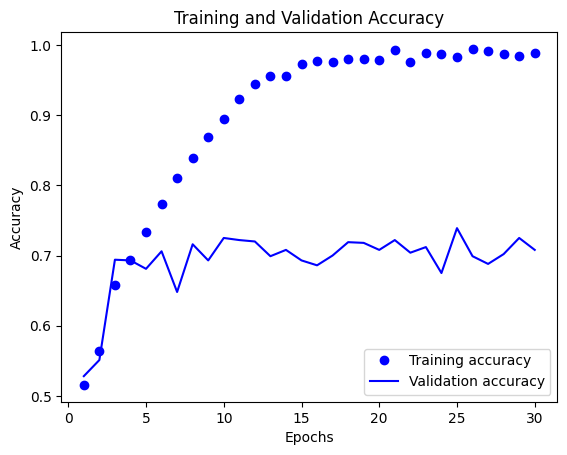

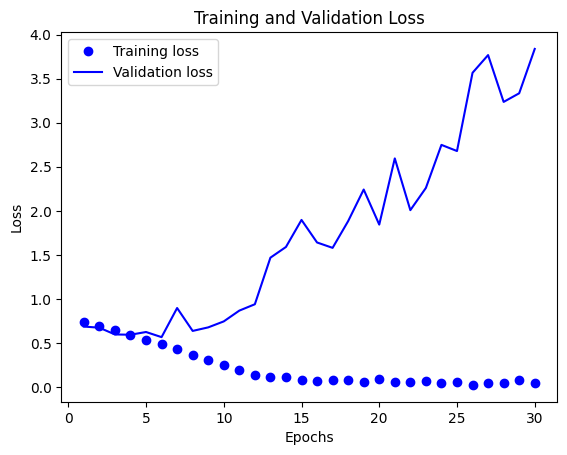

In [21]:
# 훈련 결과 시각화

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [22]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
# 40도 이내로 회전해본다, 0.2범위 내에서 좌우로 이동해본다, 0.2 범위 내에서 상하로 이동해본다,
# 이미지를 0.2정도 기울여본다, 0.2정도 확대해본다, 상하 반전을 해본다, 빈 값은 근처값으로 채운다.

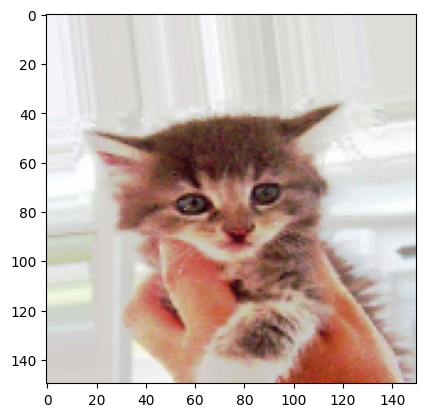

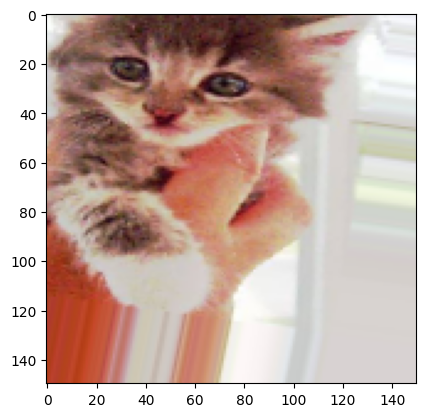

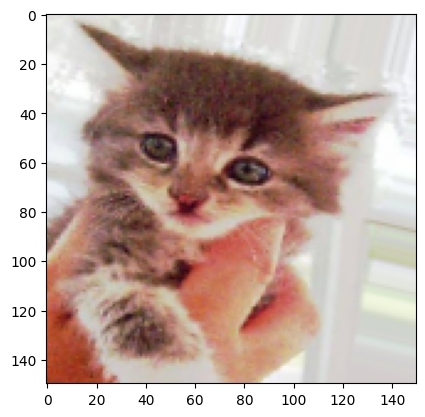

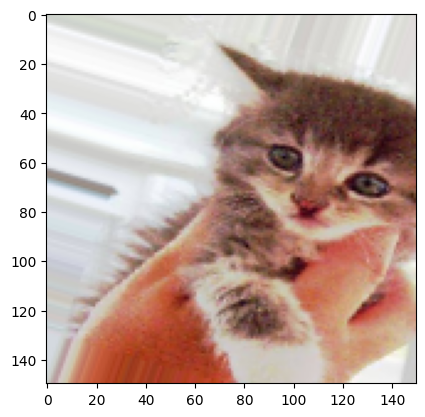

In [25]:
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break

plt.show()
# 실제 조작된 이미지 표시

In [26]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True,)    # 검증 데이터는 증식되어서는 안 됩니다!

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
                                                    #타겟 폴더 # 모든 이미지를 150 × 150 크기로 바꿉니다  # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

history = model.fit_generator(train_generator, steps_per_epoch=5, epochs=100,
                              validation_data=validation_generator, validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


C:\Users\user\AppData\Local\Temp\ipykernel_11348\458290656.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=5, epochs=100,


5/5 [==============================] - 6s 1s/step - loss: 1.6722 - accuracy: 0.6938 - val_loss: 0.8086 - val_accuracy: 0.6460
Epoch 2/100
5/5 [==============================] - 2s 409ms/step - loss: 0.8225 - accuracy: 0.6250
Epoch 3/100
5/5 [==============================] - 2s 447ms/step - loss: 0.8005 - accuracy: 0.5312
Epoch 4/100
5/5 [==============================] - 2s 441ms/step - loss: 0.7783 - accuracy: 0.5437
Epoch 5/100
5/5 [==============================] - 2s 449ms/step - loss: 0.7212 - accuracy: 0.6187
Epoch 6/100
5/5 [==============================] - 2s 449ms/step - loss: 0.6713 - accuracy: 0.6062
Epoch 7/100
5/5 [==============================] - 2s 451ms/step - loss: 1.0248 - accuracy: 0.6000
Epoch 8/100
5/5 [==============================] - 2s 457ms/step - loss: 0.6275 - accuracy: 0.6187
Epoch 9/100
5/5 [==============================] - 2s 452ms/step - loss: 0.6363 - accuracy: 0.6438
Epoch 10/100
5/5 [==============================] - 2s 409ms/step - loss: 0.6004 -